<br>

##   hw6pr2digits_modeler 
+ digits clasification via decision trees and random forests...
+ Remember: feel free to re-use the cleaned data from previous weeks (already here)


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Data set up...
+ Use the cleaned data from prior weeks (it should be here in this folder as digits_cleaned.csv)
+ (I don't think there's too much more to adjust, data-wise...)
+ Next, let's see how well the DT/RF techniques can predict the digit, based on its 64 pixels...

In [30]:
digits_df = pd.read_csv("digits_cleaned.csv")


print("Columns in digits_df:", digits_df.columns)




TARGET_COLUMN = 'actual_digit'
X_all = digits_df.drop(TARGET_COLUMN, axis=1)
y_all = digits_df[TARGET_COLUMN]


SPECIES = [str(x) for x in digits_df[TARGET_COLUMN].unique()] 
print("SPECIES are\n", SPECIES)



Columns in digits_df: Index(['pix0', 'pix1', 'pix2', 'pix3', 'pix4', 'pix5', 'pix6', 'pix7', 'pix8',
       'pix9', 'pix10', 'pix11', 'pix12', 'pix13', 'pix14', 'pix15', 'pix16',
       'pix17', 'pix18', 'pix19', 'pix20', 'pix21', 'pix22', 'pix23', 'pix24',
       'pix25', 'pix26', 'pix27', 'pix28', 'pix29', 'pix30', 'pix31', 'pix32',
       'pix33', 'pix34', 'pix35', 'pix36', 'pix37', 'pix38', 'pix39', 'pix40',
       'pix41', 'pix42', 'pix43', 'pix44', 'pix45', 'pix46', 'pix47', 'pix48',
       'pix49', 'pix50', 'pix51', 'pix52', 'pix53', 'pix54', 'pix55', 'pix56',
       'pix57', 'pix58', 'pix59', 'pix60', 'pix61', 'pix62', 'pix63',
       'actual_digit'],
      dtype='object')
SPECIES are
 ['8', '9', '0', '1', '2', '3', '4', '5', '6', '7']


## First: &nbsp; _Decision Trees_

Best max_depth found by cross-validation: 6
Decision Tree Model Evaluation:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       0.59      0.48      0.53        33
           2       0.73      0.65      0.69        37
           3       0.82      0.72      0.77        43
           4       0.92      0.82      0.87        40
           5       0.97      0.94      0.95        32
           6       1.00      0.89      0.94        38
           7       0.80      0.85      0.82        33
           8       0.42      0.83      0.56        30
           9       0.81      0.65      0.72        40

    accuracy                           0.78       354
   macro avg       0.80      0.78      0.78       354
weighted avg       0.81      0.78      0.78       354

Accuracy: 0.7768361581920904


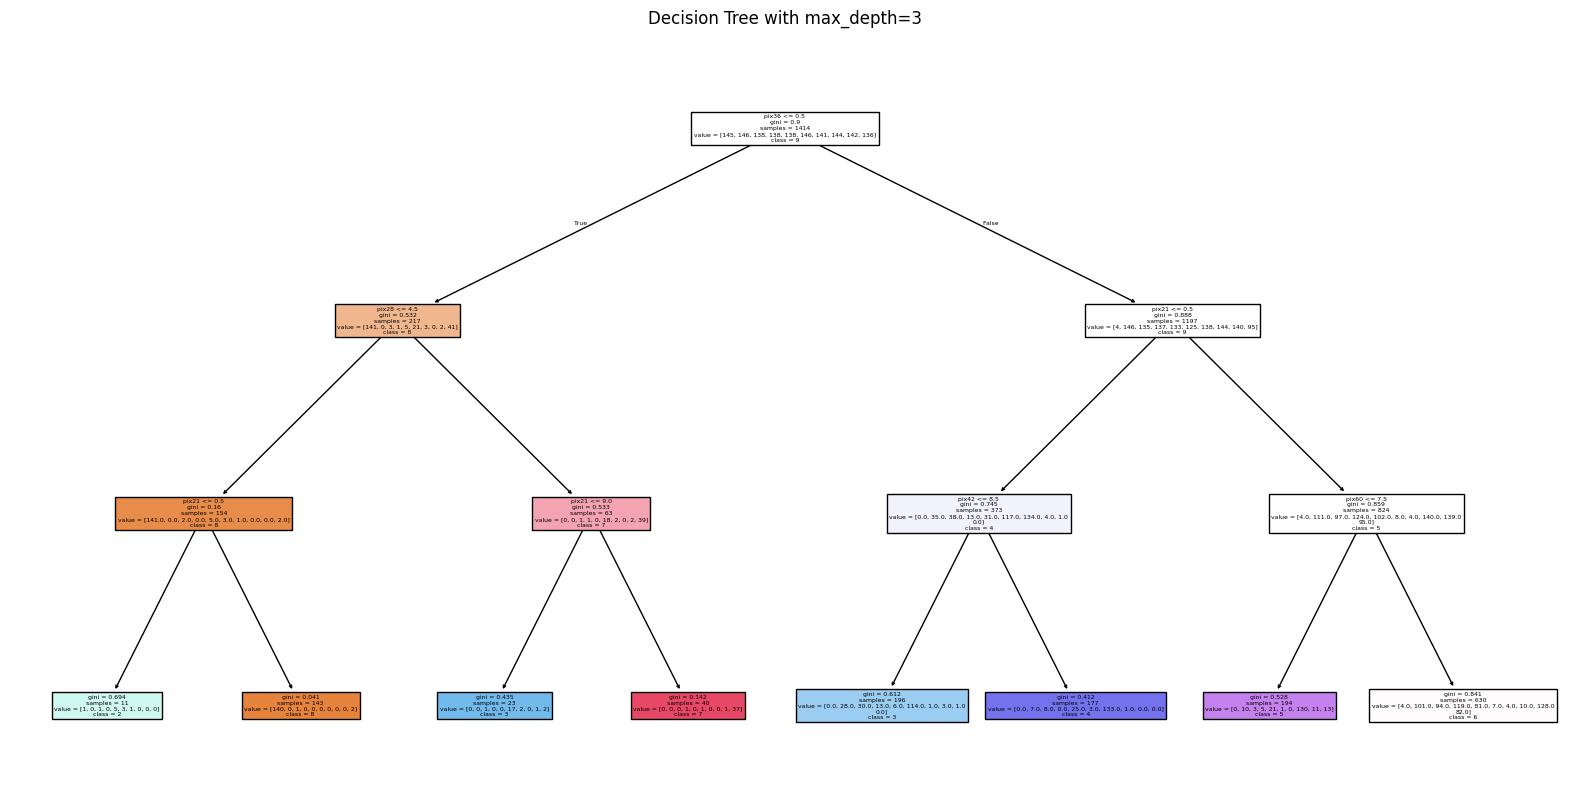

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)


param_grid = {'max_depth': range(1, 7)}  
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid,
                           cv=5, 
                           scoring='accuracy')
grid_search.fit(X_train, y_train)

best_max_depth = grid_search.best_params_['max_depth']
print(f"Best max_depth found by cross-validation: {best_max_depth}")


dt_model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
dt_model.fit(X_train, y_train)


dt_pred = dt_model.predict(X_test)
print("Decision Tree Model Evaluation:")
print(classification_report(y_test, dt_pred))
print("Accuracy:", accuracy_score(y_test, dt_pred))


dt_model_visual = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model_visual.fit(X_train, y_train)

plt.figure(figsize=(20,10)) 
plot_tree(dt_model_visual,
          feature_names=X_all.columns,
          class_names=SPECIES,
          filled=True)
plt.title("Decision Tree with max_depth=3")
plt.show()

## Then: &nbsp; _Random Forests_

In [32]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],  
    'max_depth': range(3, 7)        
}


grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                              param_grid_rf,
                              cv=3,  
                              scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

best_rf_model = grid_search_rf.best_estimator_
print("Best Random Forest Model:", best_rf_model)


rf_pred = best_rf_model.predict(X_test)
print("\nRandom Forest Model Evaluation:")
print(classification_report(y_test, rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))


LoD = [[0,0,0,8,14,0,0,0,0,0,5,16,11,0,0,0,0,1,15,14,1,6,0,0,0,7,16,5,3,16,8,0,0,8,16,8,14,16,2,0,0,0,6,14,16,11,0,0,0,0,0,6,16,4,0,0,0,0,0,10,15,0,0,0],
[0,0,0,5,14,12,2,0,0,0,7,15,8,14,4,0,0,0,6,2,3,13,1,0,0,0,0,1,13,4,0,0,0,0,1,11,9,0,0,0,0,8,16,13,0,0,0,0,0,5,14,16,11,2,0,0,0,0,0,6,12,13,3,0],
[0,0,0,3,16,3,0,0,0,0,0,12,16,2,0,0,0,0,8,16,16,4,0,0,0,7,16,15,16,12,11,0,0,8,16,16,16,13,3,0,0,0,0,7,14,1,0,0,0,0,0,6,16,0,0,0,0,0,0,4,14,0,0,0],
[0,0,0,3,15,10,1,0,0,0,0,11,10,16,4,0,0,0,0,12,1,15,6,0,0,0,0,3,4,15,4,0,0,0,0,6,15,6,0,0,0,4,15,16,9,0,0,0,0,0,13,16,15,9,3,0,0,0,0,4,9,14,7,0],
[0,0,0,3,16,3,0,0,0,0,0,10,16,11,0,0,0,0,4,16,16,8,0,0,0,2,14,12,16,5,0,0,0,10,16,14,16,16,11,0,0,5,12,13,16,8,3,0,0,0,0,2,15,3,0,0,0,0,0,4,12,0,0,0],
[0,0,7,15,15,4,0,0,0,8,16,16,16,4,0,0,0,8,15,8,16,4,0,0,0,0,0,10,15,0,0,0,0,0,1,15,9,0,0,0,0,0,6,16,2,0,0,0,0,0,8,16,8,11,9,0,0,0,9,16,16,12,3,0]]


LoD_pred_dt = dt_model.predict(LoD)
LoD_pred_rf = best_rf_model.predict(LoD)

print("\nPredictions on LoD (Decision Tree):", LoD_pred_dt)
print("Predictions on LoD (Random Forest):", LoD_pred_rf)

Best Random Forest Model: RandomForestClassifier(max_depth=6, random_state=42)

Random Forest Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.92      1.00      0.96        33
           2       1.00      0.97      0.99        37
           3       0.97      0.88      0.93        43
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        32
           6       1.00      0.97      0.99        38
           7       0.89      1.00      0.94        33
           8       0.85      0.97      0.91        30
           9       1.00      0.88      0.93        40

    accuracy                           0.96       354
   macro avg       0.96      0.97      0.96       354
weighted avg       0.97      0.96      0.96       354

Accuracy: 0.963276836158192

Predictions on LoD (Decision Tree): [4 2 4 2 1 8]
Predictions on LoD (Random Forest): [4 2 4 2 4 2]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


<br>
<hr>
<br>

### Final task: &nbsp; _Visualizing_ pixel-importance:
+ using your best Random Forest model, find the 64 _relative feature importances_ for all 64 of the digits' pixels!
  + Show these as a list of 64 values (they will be difficult to imagine, but you will see that they vary a great deal, pixel-to-pixel)
+ Then, grab-and-adapt the code for visualizing individual digits in order to visualize the "importance image" of pixels...
+ that is, you'll create a heat map visualization, which is really just another image, of how relatively-important each of the 64 pixels is in your final Random Forest

This visualization will be a "low-res image" similar to the digits, ***but it won't itself be a digit*** 
+ Instead, it will show _how much_ each of the 64 spots, across all of the 8x8 grids in the dataset, contribute in classifying each digit...


Feature Importances from Random Forest:
 [0.         0.00083843 0.01896975 0.00908048 0.006606   0.01374034
 0.01227833 0.00025002 0.         0.01133682 0.02583378 0.00299173
 0.0094569  0.02800596 0.0031312  0.00071666 0.         0.00651995
 0.01808235 0.02528474 0.03791131 0.05242166 0.00941228 0.00032602
 0.         0.01750078 0.03742482 0.02265919 0.03514518 0.02197757
 0.03518253 0.00013439 0.         0.03443634 0.02781081 0.01864337
 0.05295757 0.01621517 0.02299142 0.         0.         0.00977414
 0.03653215 0.04597382 0.02001406 0.01630746 0.01920693 0.
 0.         0.00174894 0.01804094 0.01480392 0.0145027  0.02642247
 0.02861551 0.00079247 0.         0.00118076 0.02409634 0.00636476
 0.03419315 0.02592465 0.01584364 0.00338734]


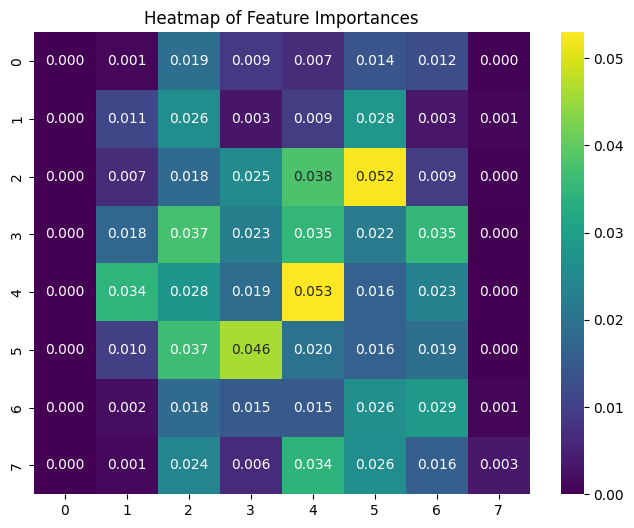

In [33]:

feature_importances = best_rf_model.feature_importances_
print("\nFeature Importances from Random Forest:\n", feature_importances)


feature_importances_image = feature_importances.reshape(8, 8)


plt.figure(figsize=(8, 6))
sns.heatmap(feature_importances_image, annot=True, cmap="viridis", fmt=".3f")  # You can change the cmap
plt.title("Heatmap of Feature Importances")
plt.show()





In [34]:
#
# That's it!  Welcome to the world of model-building workflows!!    
#
#             Our prediction?  We'll be back for more ML! 
#


# If you'd like, the EC is to run a DT/RF workflow on your own data...   (in hw6ec_modeler.ipynb)

